Pivot Table (Mean Scores):
           Maths  Science  Social
Name                            
Karthik      75       50      55
Rohan        85       95      50
Shyamala     96       65      56
Unnathi      87       80      60

DataFrame with New Row and Total Column:
           Name  Maths  Science  Social  Total
0        Rohan     85       95      50    230
1      Karthik     75       50      55    180
2     Shyamala     96       65      56    217
3      Unnathi     87       80      60    227
4  New_Student     88       75      78    241

Sorted Data (Maths > 80):
           Name  Maths  Science  Social  Total
2     Shyamala     96       65      56    217
4  New_Student     88       75      78    241
3      Unnathi     87       80      60    227
0        Rohan     85       95      50    230


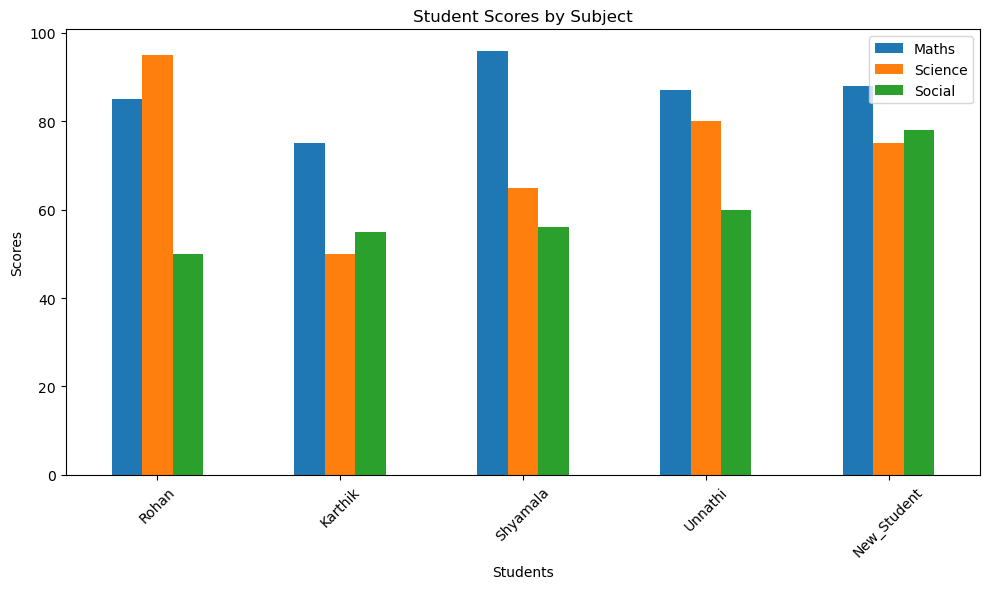

In [47]:
# cie1  1
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create a DataFrame
data = {
    'Name': ['Rohan', 'Karthik', 'Shyamala', 'Unnathi'],
    'Maths': [85, 75, 96, 87],
    'Science': [95, 50, 65, 80],
    'Social': [50, 55, 56, 60]
}
df = pd.DataFrame(data)

# Step 2: Create a pivot table (mean of subjects)
pivot_table = df.pivot_table(index='Name', aggfunc='mean').astype(int)
print("Pivot Table (Mean Scores):\n", pivot_table)

# Step 3: Add a custom row (new student) and a column (total)
new_row = pd.DataFrame({'Name': ['New_Student'], 'Maths': [88], 'Science': [75], 'Social': [78]})
df = pd.concat([df, new_row], ignore_index=True)

# Add the "Total" column by summing the subject scores
df['Total'] = df[['Maths', 'Science', 'Social']].sum(axis=1)
print("\nDataFrame with New Row and Total Column:\n", df)

# Step 4: Sort by Maths scores greater than 80
sorted_df = df[df['Maths'] > 80].sort_values(by='Maths', ascending=False)
print("\nSorted Data (Maths > 80):\n", sorted_df)

# Step 5: Visualize the data
df.set_index('Name')[['Maths', 'Science', 'Social']].plot(kind='bar', figsize=(10,6))
plt.title('Student Scores by Subject')
plt.xlabel('Students')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


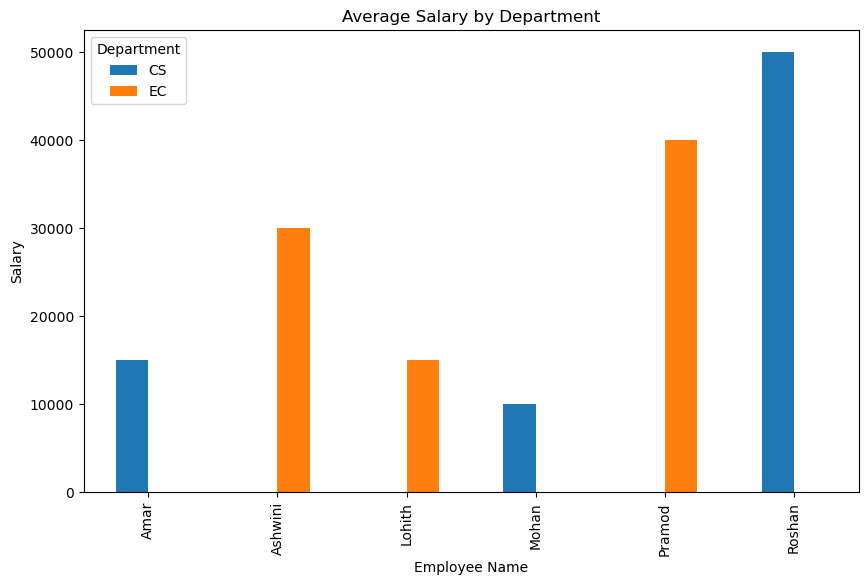

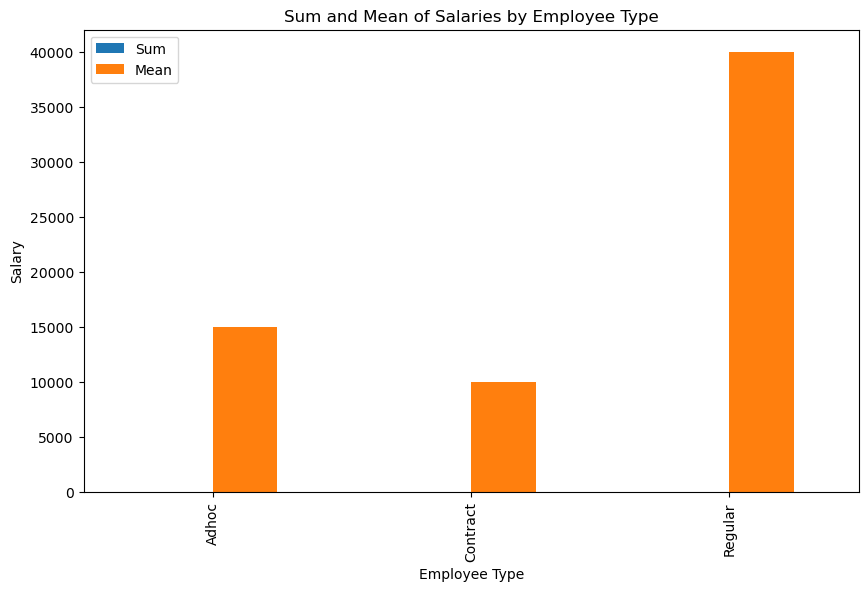

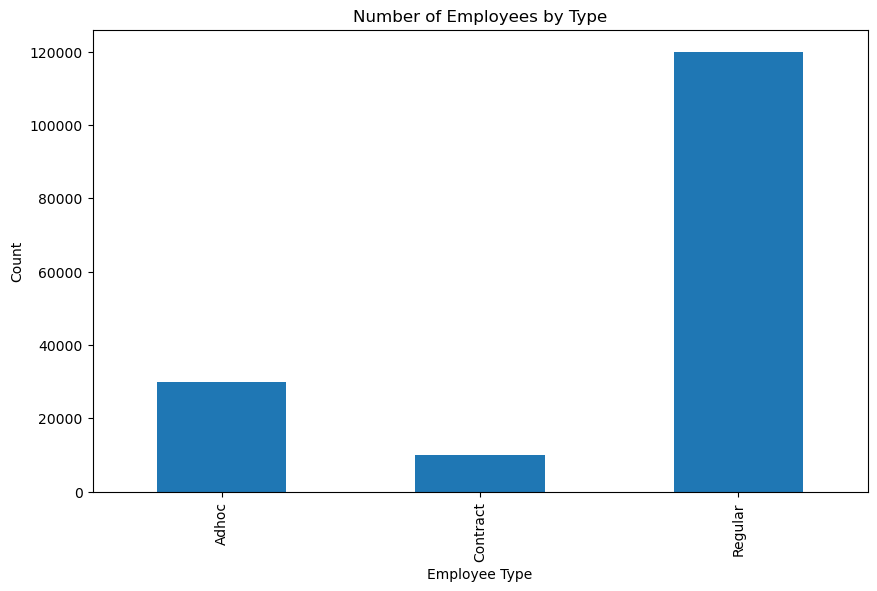

In [49]:
# cie1  2
import pandas as pd
import matplotlib.pyplot as plt
data = {'Ename': ['Roshan', 'Amar', 'Ashwini', 'Lohith', 'Mohan', 'Pramod'],
    'Type': ['Regular', 'Adhoc', 'Regular', 'Adhoc', 'Contract', 'Regular'],
    'Department': ['CS', 'CS', 'EC', 'EC', 'CS', 'EC'],
    'Experience': [10, 20, 5, 14, 9, 'L'],
    'Salary': [50000, 15000, 30000, 15000, 10000, 40000]}

df = pd.DataFrame(data)
pivot_avg_salary = df.pivot_table(index='Ename', columns='Department', values='Salary', aggfunc='mean')
pivot_sum_mean_count = df.pivot_table(index='Type', values='Salary', aggfunc={'Salary': ['sum', 'mean', 'count']})
pivot_sum_mean_count.columns = ['Sum', 'Mean', 'Count']
pivot_avg_salary.plot(kind='bar', figsize=(10, 6))
plt.title('Average Salary by Department')
plt.ylabel('Salary')
plt.xlabel('Employee Name')
plt.savefig('avg_salary_by_department.png')
plt.show()
pivot_sum_mean_count[['Sum', 'Mean']].plot(kind='bar', figsize=(10, 6))
plt.title('Sum and Mean of Salaries by Employee Type')
plt.ylabel('Salary')
plt.xlabel('Employee Type')
plt.savefig('sum_mean_salary_by_type.png')
plt.show()
pivot_sum_mean_count['Count'].plot(kind='bar', figsize=(10, 6))
plt.title('Number of Employees by Type')
plt.ylabel('Count')
plt.xlabel('Employee Type')
plt.savefig('count_by_type.png')
plt.show()




In [73]:
# cie2  1

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 1. Load the Dataset
file_path = r"C:\Users\User\Desktop\AI and ML\agriculture.csv"  # Use raw string for Windows path

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path and try again.")
    raise

# 2. Handling Missing Values
# a. Identify missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# b. Drop columns with too many missing values (e.g., more than 50%)
threshold = 0.5 * len(df)
df = df.dropna(axis=1, thresh=threshold)

# c. Impute missing values in numerical columns with the mean
# Apply mean imputation only to numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

    
# 3. Removing Duplicates
df = df.drop_duplicates()

# 4. Data Type Conversion
# Convert 'Date' column to datetime (if exists), handle errors
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# 5. Outlier Detection and Handling
# a. Detect outliers using the IQR method (for numeric columns only)
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))
print("Outliers detected:\n", outliers)

# b. Optionally, remove outliers (for numerical columns)
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# 6. Normalization and Scaling
# Example: Min-Max Scaling (apply scaling only to numeric columns like 'Production')
if 'Production' in df.columns:
    scaler = MinMaxScaler()
    df[['Production']] = scaler.fit_transform(df[['Production']])

# 7. Handling Inconsistent Data
# Example: Standardizing text data (remove spaces, make lowercase) for 'Crop' column
if 'Crop' in df.columns:
    df['Crop'] = df['Crop'].str.strip().str.lower()

# 8. Removing Irrelevant Columns
# Example: Dropping columns not needed for analysis
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])  # replace 'Unnamed: 0' with actual column names if needed

# Save the cleaned dataset to a new CSV file
cleaned_file_path = 'cleaned_agriculture_production.csv'
df.to_csv(cleaned_file_path, index=False)

print("Data cleaning completed. Cleaned dataset saved to:", cleaned_file_path)


Dataset loaded successfully.
Missing values in each column:
 name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64
Outliers detected:
        mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    False      False         False       False   False         False   
1    False      False         False       False   False         False   
2    False      False         False       False   False         False   
3    False      False         False       False   False         False   
4    False      False         False       False   False         False   
..     ...        ...           ...         ...     ...           ...   
393  False      False         False       False   False         False   
394  False      False         False       False   False          True   
395  False      False         False       False   False         False   
396  False    

   ID  Age  Salary  Experience
0   1   25   50000           2
1   2   30   60000           5
2   3   45   80000          10
3   4   50  120000          20
4   5   22   45000           1
5   6   35   65000           7
6   7   40   70000           8
7   8   60   90000          15
8   9   70  200000          25
9  10   28   55000           3
Outliers:
    ID  Age  Salary  Experience
8   9   70  200000          25


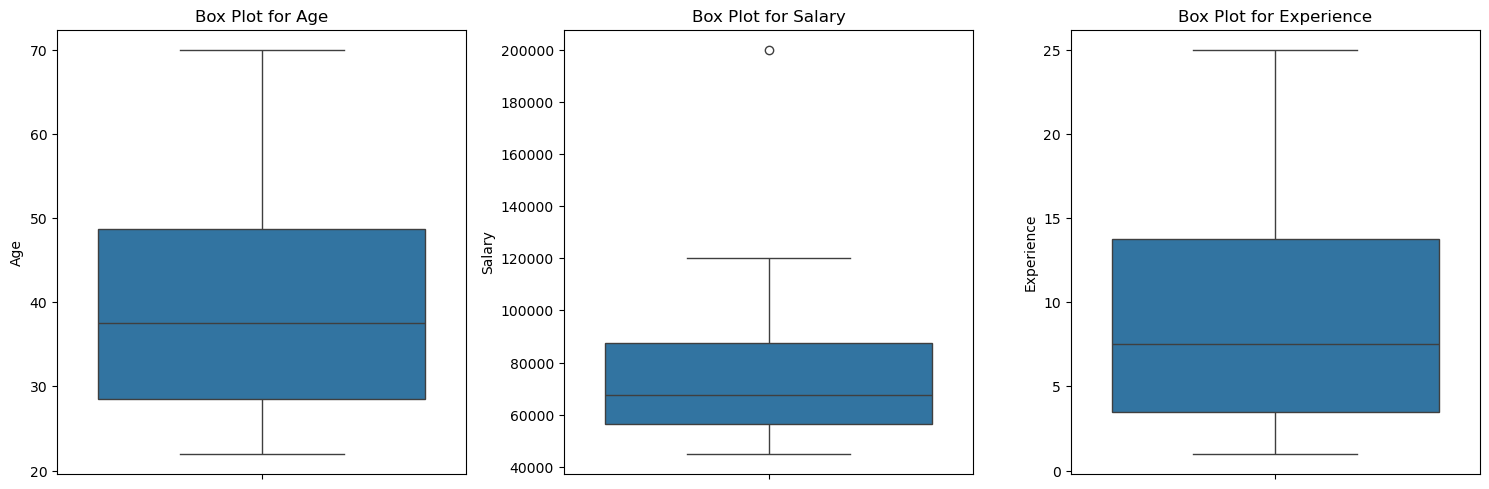

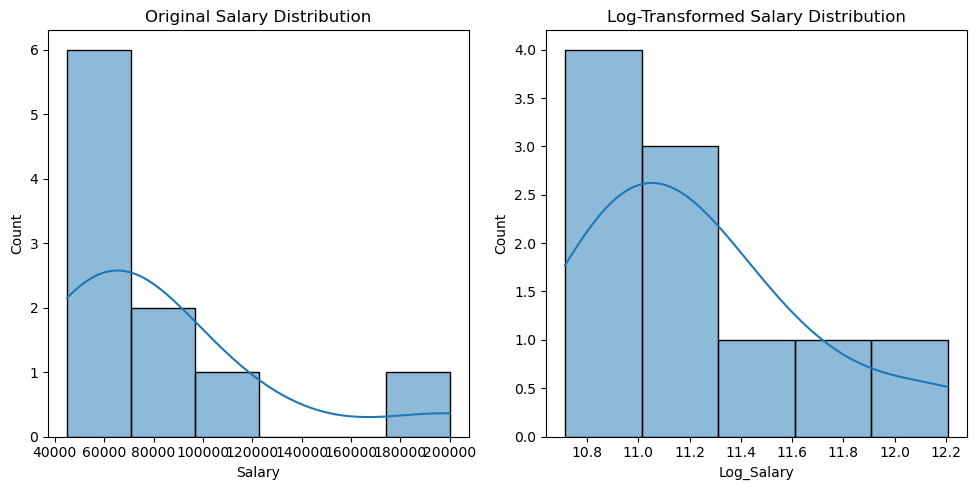

   ID  Age_Scaled  Salary_Scaled  Experience_Scaled
0   1    0.062500       0.032258           0.041667
1   2    0.166667       0.096774           0.166667
2   3    0.479167       0.225806           0.375000
3   4    0.583333       0.483871           0.791667
4   5    0.000000       0.000000           0.000000
5   6    0.270833       0.129032           0.250000
6   7    0.375000       0.161290           0.291667
7   8    0.791667       0.290323           0.583333
8   9    1.000000       1.000000           1.000000
9  10    0.125000       0.064516           0.083333


In [77]:
# cie2 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the DataFrame
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [25, 30, 45, 50, 22, 35, 40, 60, 70, 28],
    'Salary': [50000, 60000, 80000, 120000, 45000, 65000, 70000, 90000, 200000, 55000],
    'Experience': [2, 5, 10, 20, 1, 7, 8, 15, 25, 3]
}
df = pd.DataFrame(data)

print(df)

# Calculate IQR for each numerical column
Q1 = df[['Age', 'Salary', 'Experience']].quantile(0.25)
Q3 = df[['Age', 'Salary', 'Experience']].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = df[((df[['Age', 'Salary', 'Experience']] < (Q1 - 1.5 * IQR)) | (df[['Age', 'Salary', 'Experience']] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Outliers:\n", outliers)

# Visualization of Outliers using Box Plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(df['Age'])
plt.title('Box Plot for Age')

plt.subplot(1, 3, 2)
sns.boxplot(df['Salary'])
plt.title('Box Plot for Salary')

plt.subplot(1, 3, 3)
sns.boxplot(df['Experience'])
plt.title('Box Plot for Experience')

plt.tight_layout()
plt.show()
# Log transformation to reduce the impact of outliers
df['Log_Salary'] = np.log(df['Salary'])

# Visualization of Transformed Data
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Salary'], kde=True)
plt.title('Original Salary Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Log_Salary'], kde=True)
plt.title('Log-Transformed Salary Distribution')

plt.tight_layout()
plt.show()
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Age_Scaled', 'Salary_Scaled', 'Experience_Scaled']] = scaler.fit_transform(df[['Age', 'Salary', 'Experience']])

# Displaying the transformed data
print(df[['ID', 'Age_Scaled', 'Salary_Scaled', 'Experience_Scaled']])


In [85]:
# cie3  1
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Boston Housing dataset using fetch_openml
boston = fetch_openml(name='boston', version=1, as_frame=True)

# Convert to DataFrame for easier exploration
data = boston.frame

# Explore the dataset
dataset_info = {
    "shape": data.shape,
    "columns": data.columns.tolist(),
    "head": data.head(),
    "description": data.describe()
}

# Checking for missing values
missing_values = data.isnull().sum()

# Preprocess the data
# Scaling features
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Split the data into training and testing sets
X = scaled_data.drop('MEDV', axis=1)  # MEDV is the price column in the Boston dataset
y = scaled_data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output results
dataset_info, missing_values, X_train.shape, X_test.shape, y_train.shape, y_test.shape


({'shape': (506, 14),
  'columns': ['CRIM',
   'ZN',
   'INDUS',
   'CHAS',
   'NOX',
   'RM',
   'AGE',
   'DIS',
   'RAD',
   'TAX',
   'PTRATIO',
   'B',
   'LSTAT',
   'MEDV'],
  'head':       CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
  0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
  1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
  2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
  3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
  4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   
  
          B  LSTAT  MEDV  
  0  396.90   4.98  24.0  
  1  396.90   9.14  21.6  
  2  392.83   4.03  34.7  
  3  394.63   2.94  33.4  
  4  396.90   5.33  36.2  ,
  'description':              CRIM          ZN       INDUS         NOX          RM         AGE  \
  count  506.000000  506.000000  506.000000  506.000000

Dataset Shape: (6, 2)
Columns: ['CIE', 'SEE']
First Few Rows:
    CIE  SEE
0  100   96
1   34   45
2   56   56
3   78   76
4   96   78
Statistical Summary:
               CIE        SEE
count    6.000000   6.000000
mean    76.833333  75.000000
std     26.761290  21.391587
min     34.000000  45.000000
25%     61.500000  61.000000
50%     87.000000  77.000000
75%     96.750000  91.500000
max    100.000000  99.000000
Missing Values:
 CIE    0
SEE    0
dtype: int64


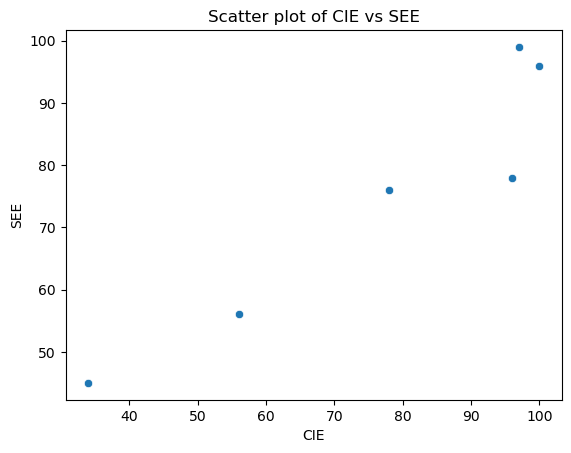

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     6.907
Date:                Wed, 16 Oct 2024   Prob (F-statistic):              0.119
Time:                        12:12:46   Log-Likelihood:                -13.579
No. Observations:                   4   AIC:                             31.16
Df Residuals:                       2   BIC:                             29.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5525     25.513      0.453      0.6

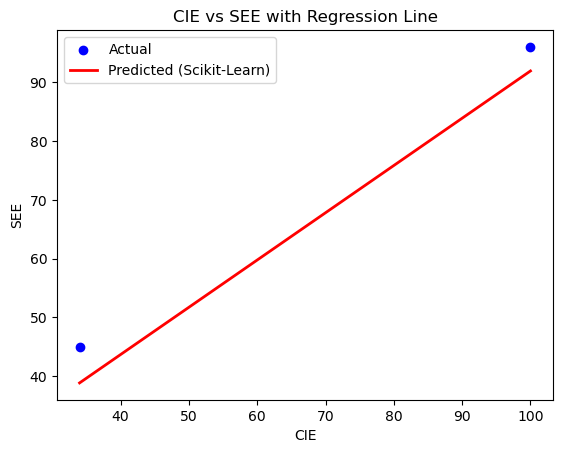

In [89]:
# cie3 2
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'cie_see_data.csv' with your actual file path)
data = pd.read_csv('C:\\Users\\user\\Desktop\\CIE AND SEE.csv')

# Explore the dataset
print("Dataset Shape:", data.shape)
print("Columns:", data.columns.tolist())
print("First Few Rows:\n", data.head())
print("Statistical Summary:\n", data.describe())

# Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Handle missing values (if any)
data.dropna(inplace=True)  # Drop rows with missing values

# Visualize the relationship between CIE and SEE
sns.scatterplot(x=data['CIE'], y=data['SEE'])
plt.title('Scatter plot of CIE vs SEE')
plt.xlabel('CIE')
plt.ylabel('SEE')
plt.show()

# Prepare the data for modeling
X = data['CIE'].values.reshape(-1, 1)  # Predictor (CIE)
y = data['SEE'].values  # Target (SEE)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model 1: Using Statsmodels ---
X_train_sm = sm.add_constant(X_train)  # Add a constant term for the intercept
model_sm = sm.OLS(y_train, X_train_sm).fit()  # Fit the model
print(model_sm.summary())  # Print the summary of the model

# Predict using the Statsmodels model
X_test_sm = sm.add_constant(X_test)
y_pred_sm = model_sm.predict(X_test_sm)

# --- Model 2: Using Scikit-Learn ---
model_sk = LinearRegression()
model_sk.fit(X_train, y_train)  # Fit the model

# Predict using the Scikit-Learn model
y_pred_sk = model_sk.predict(X_test)

# Evaluate the models
mse_sm = mean_squared_error(y_test, y_pred_sm)
r2_sm = r2_score(y_test, y_pred_sm)
print(f"Statsmodels - Mean Squared Error: {mse_sm}, R-squared: {r2_sm}")

mse_sk = mean_squared_error(y_test, y_pred_sk)
r2_sk = r2_score(y_test, y_pred_sk)
print(f"Scikit-Learn - Mean Squared Error: {mse_sk}, R-squared: {r2_sk}")

# Plot the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_sk, color='red', linewidth=2, label='Predicted (Scikit-Learn)')
plt.title('CIE vs SEE with Regression Line')
plt.xlabel('CIE')
plt.ylabel('SEE')
plt.legend()
plt.show()


First few rows of the dataset:
    Rainfall       Yield
0  54.967142  123.264146
1  48.617357  117.336939
2  56.476885  137.765068
3  65.230299  155.052974
4  47.658466  117.533309

Summary of the statsmodels OLS regression:
                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     503.0
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           2.23e-40
Time:                        12:14:14   Log-Likelihood:                -365.97
No. Observations:                 100   AIC:                             735.9
Df Residuals:                      98   BIC:                             741.1
Df Model:                           1                                         
Covariance Type:            nonrobust                           

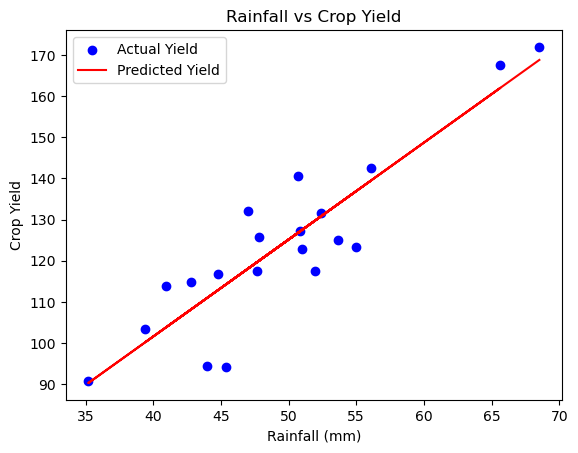

In [91]:
# cie3 3
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
np.random.seed(42)
rainfall = np.random.normal(50, 10, 100) 
yield_ = 2.5 * rainfall + np.random.normal(0, 10, 100)
data = pd.DataFrame({'Rainfall': rainfall, 'Yield': yield_})
print("First few rows of the dataset:")
print(data.head())
X = sm.add_constant(data['Rainfall'])
y = data['Yield']
model = sm.OLS(y, X).fit()
print("\nSummary of the statsmodels OLS regression:")
print(model.summary())
X_train, X_test, y_train, y_test = train_test_split(data[['Rainfall']], data['Yield'], test_size=0.2, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'\nMean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')
plt.scatter(X_test, y_test, color='blue', label='Actual Yield')
plt.plot(X_test, y_pred, color='red', label='Predicted Yield')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Crop Yield')
plt.title('Rainfall vs Crop Yield')
plt.legend()
plt.show()

Accuracy: 1.00
Confusion Matrix:
[[12  0]
 [ 0  8]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



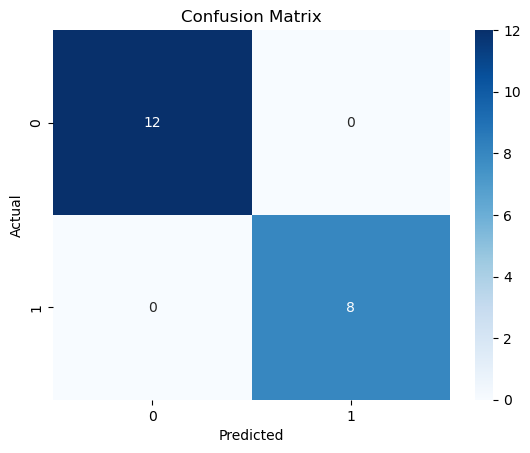

Best Parameters: {'C': 0.01}
Accuracy of Best Model: 1.0


In [95]:
#cie4 1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Let's simplify this to a binary classification problem (e.g., classify setosa vs. non-setosa)
df = df[df['target'] != 2]  # Remove the class 2 (virginica)
df['target'] = df['target'].apply(lambda x: 1 if x == 1 else 0)  # Convert the target to 0 and 1

# Split the data into features (X) and target (y)
X = df.drop(columns='target')
y = df['target']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model with liblinear solver
model = LogisticRegression(solver='liblinear')

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Visualize the Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Define a parameter grid for hyperparameter tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Perform grid search with cross-validation
grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)
grid.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid.best_estimator_
print('Best Parameters:', grid.best_params_)

# Evaluate the best model on the test data
y_pred_best = best_model.predict(X_test)
print('Accuracy of Best Model:', accuracy_score(y_test, y_pred_best))


  Species  Weight  V_length  D_length  C_length   Height   Width
0   Bream   242.0      23.2      25.4      30.0  11.5200  4.0200
1   Bream   290.0      24.0      26.3      31.2  12.4800  4.3056
2   Bream   340.0      23.9      26.5      31.1  12.3778  4.6961
3   Bream   363.0      26.3      29.0      33.5  12.7300  4.4555
4   Bream   430.0      26.5      29.0      34.0  12.4440  5.1340
Species     0
Weight      0
V_length    0
D_length    0
C_length    0
Height      0
Width       0
dtype: int64
            Weight    V_length    D_length    C_length      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    399.269811   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.118564    9.996441   10.716328   11.610246    4.286208    1.685804
min       5.900000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     122.500000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.2

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


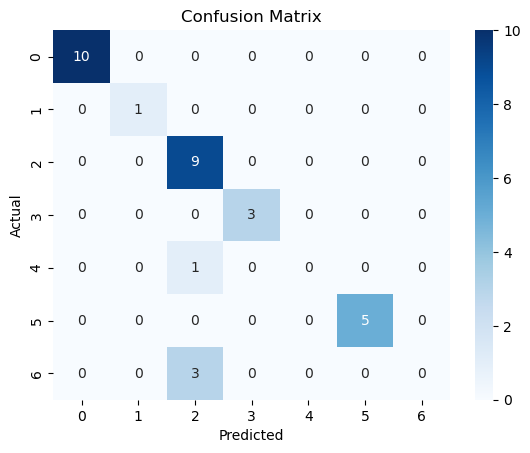

C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy of Best Model: 0.9375


In [99]:
#cie4 2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("C:\\Users\\User\\Desktop\\AI and ML\\Fish.csv")

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Get a summary of the dataset
print(df.describe())

# Check the distribution of the target variable
print(df['Species'].value_counts())
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Define features and target
X = df.drop('Species', axis=1)
y = df['Species']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize the SVM model with the RBF kernel
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)
# Predict the target values for the test set
y_pred = model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Visualize the Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Perform grid search with cross-validation
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid.best_estimator_
print('Best Parameters:', grid.best_params_)

# Evaluate the best model on the test data
y_pred_best = best_model.predict(X_test)
print('Accuracy of Best Model:', accuracy_score(y_test, y_pred_best))


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

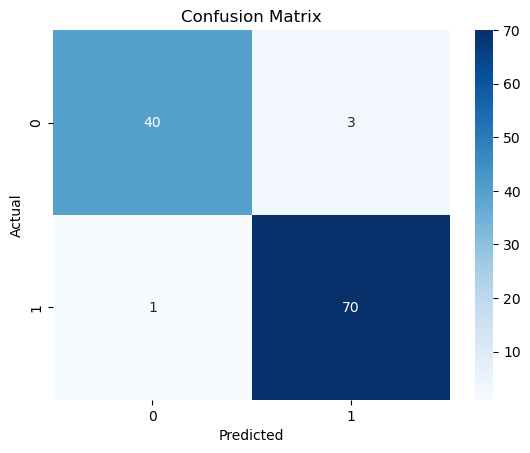

In [101]:
#cie4 3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data = load_breast_cancer()

# Create a DataFrame from the data
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Get a summary of the dataset
print(df.describe())

# Check the distribution of the target variable
print(df['target'].value_counts())
# Define features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)
# Predict the target values for the test set
y_pred = rf_model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Visualize the Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
target
0    50
1    50
2    50
Name: count, dtype: int64


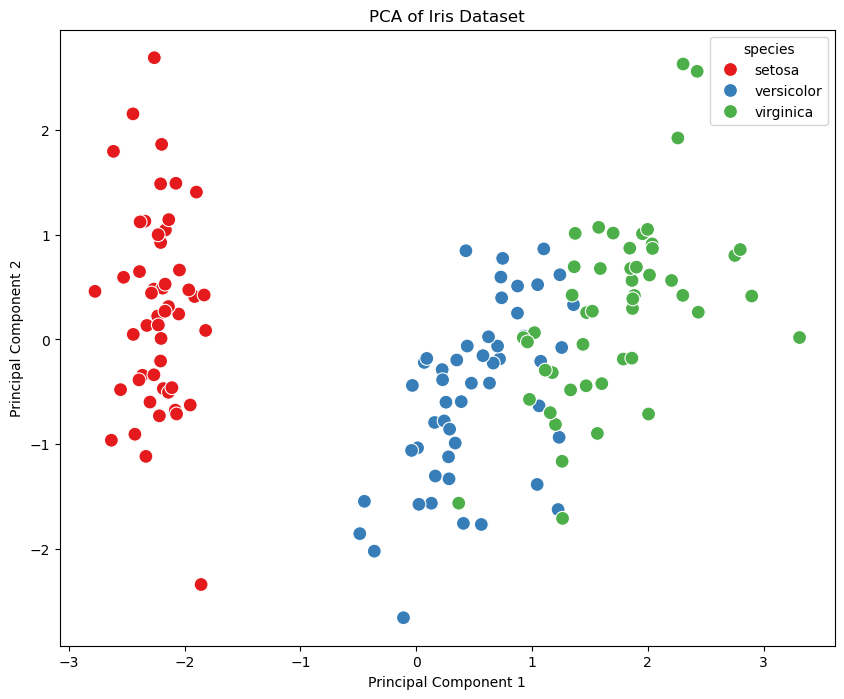

Explained Variance by PCA1: 0.73
Explained Variance by PCA2: 0.23


In [103]:
#cie4 4
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
# Load the Iris dataset
iris = load_iris()

# Create a DataFrame from the data
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Display the first few rows of the dataset
print(df.head())

# Check the distribution of the target variable
print(df['target'].value_counts())
# Separate features and target
X = df.drop(columns='target')
y = df['target']

# Standardize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA on the scaled data
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['target'] = y

# Map target labels to the actual species names
df_pca['species'] = df_pca['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Plot the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='species', data=df_pca, palette='Set1', s=100)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Explained variance by each principal component
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance by PCA1: {explained_variance[0]:.2f}')
print(f'Explained Variance by PCA2: {explained_variance[1]:.2f}')



C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.6800 - loss: 0.6139 - val_accuracy: 0.9474 - val_loss: 0.3421
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9428 - loss: 0.2967 - val_accuracy: 0.9474 - val_loss: 0.1474
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9502 - loss: 0.1565 - val_accuracy: 0.9649 - val_loss: 0.0868
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9698 - loss: 0.0898 - val_accuracy: 0.9912 - val_loss: 0.0656
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9808 - loss: 0.0686 - val_accuracy: 0.9825 - val_loss: 0.0579
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9734 - loss: 0.0537 - val_accuracy: 0.9825 - val_loss: 0.0587
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9859 - loss: 0.0455 - val_accuracy: 0.9825 - val_loss: 0.0554
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9963 - loss: 0.0328 - val_accuracy: 0.9737 - val_los

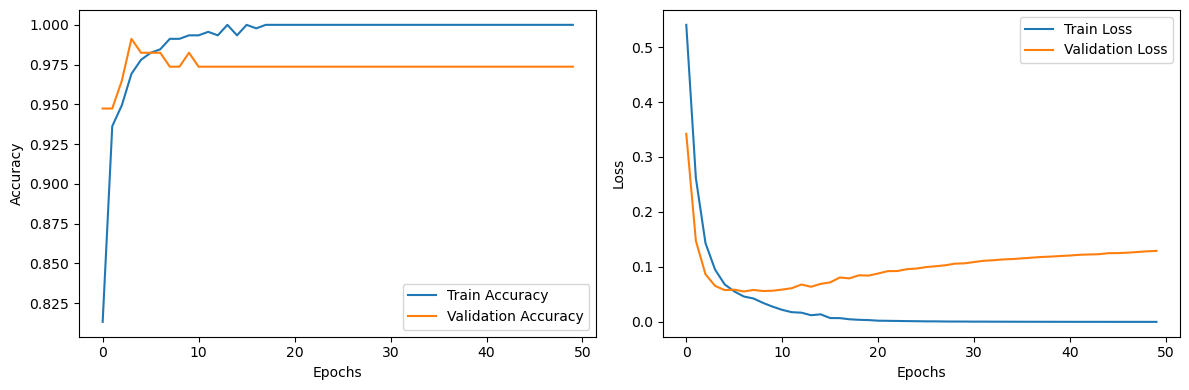

In [108]:
#cie5 1
# 14 b densce layaer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the data (scaling the features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Build the DNN model using Dense layers
model = Sequential()
# Input layer (input shape should match the number of features)
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
# Hidden layers (Dense layers with ReLU activation)
model.add(Dense(64, activation='relu'))  # First hidden layer    #improving model performance
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(32, activation='relu'))  # Third hidden layer
# Output layer for binary classification (1 unit with sigmoid activation)
model.add(Dense(1, activation='sigmoid'))   #to predict probelities
# Compile the model
model.compile(optimizer='adam',    #minimize the loss function during the trainig of neural network
              loss='binary_crossentropy',    #measures the difference between predicted binary outcomes and actual binary labels
              metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
# Plot the training and validation accuracy over epochs
plt.figure(figsize=(12, 4))
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Plot the training and validation loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [105]:
#cie5 2
# shallow neural network
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Preprocess the data
x_train = x_train.reshape((x_train.shape[0], 28 * 28)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28 * 28)).astype('float32') / 255
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# Build a shallow neural network
model = models.Sequential()
# Input layer + 1 hidden Dense layer (64 neurons)
model.add(layers.Dense(64, activation='relu', input_shape=(28 * 28,)))
# Output layer (10 neurons for 10 classes)
model.add(layers.Dense(10, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Preprocess the data
x_train = x_train.reshape((x_train.shape[0], 28 * 28)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28 * 28)).astype('float32') / 255
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# Build a shallow neural network using Dense layers
model = models.Sequential()
# Input layer + one hidden Dense layer with 64 neurons
model.add(layers.Dense(64, activation='relu', input_shape=(28 * 28,)))
# Output layer with 10 neurons (one per class) and softmax activation
model.add(layers.Dense(10, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7865 - loss: 0.7778 - val_accuracy: 0.9302 - val_loss: 0.2496
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9337 - loss: 0.2345 - val_accuracy: 0.9445 - val_loss: 0.1967
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9471 - loss: 0.1799 - val_accuracy: 0.9556 - val_loss: 0.1572
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9588 - loss: 0.1474 - val_accuracy: 0.9583 - val_loss: 0.1430
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9642 - loss: 0.1234 - val_accuracy: 0.9621 - val_loss: 0.1313
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9580 - loss: 0.1485
Test accuracy: 0.9635000228881836
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7780 - loss: 0.8136 - val_accuracy: 0.9360 - val_loss: 0.2311
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9342 - loss: 0.2314 - val_accuracy: 0.9493 - val_loss: 0.1874
E

In [110]:
#cie5 3
import nltk
from nltk import word_tokenize
from nltk.util import bigrams, trigrams

# Sample text
text = "The greatest glory in Living lies not in never falling but in raising every Lies"

# Tokenize the text
tokens = word_tokenize(text)

# Generate bigrams
bigram_list = list(bigrams(tokens))
print("Bigrams:")
for bigram in bigram_list:
    print(bigram)

# Generate trigrams
trigram_list = list(trigrams(tokens))
print("\nTrigrams:")
for trigram in trigram_list:
    print(trigram)


Bigrams:
('The', 'greatest')
('greatest', 'glory')
('glory', 'in')
('in', 'Living')
('Living', 'lies')
('lies', 'not')
('not', 'in')
('in', 'never')
('never', 'falling')
('falling', 'but')
('but', 'in')
('in', 'raising')
('raising', 'every')
('every', 'Lies')

Trigrams:
('The', 'greatest', 'glory')
('greatest', 'glory', 'in')
('glory', 'in', 'Living')
('in', 'Living', 'lies')
('Living', 'lies', 'not')
('lies', 'not', 'in')
('not', 'in', 'never')
('in', 'never', 'falling')
('never', 'falling', 'but')
('falling', 'but', 'in')
('but', 'in', 'raising')
('in', 'raising', 'every')
('raising', 'every', 'Lies')


In [112]:
#cie5 4
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Define the documents
documents = [
    "we are going to Mysore",
    "Mysore is a famous place",
    "we are going to famous place"
]

# Create a TfidfVectorizer instance
vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(documents)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Sum TF-IDF values for each word across all documents
tfidf_scores = np.asarray(tfidf_matrix.sum(axis=0)).flatten()

# Create a dictionary of words and their TF-IDF scores
word_tfidf = dict(zip(feature_names, tfidf_scores))

# Print the TF-IDF scores
print("TF-IDF scores for each word:")
for word, score in word_tfidf.items():
    print(f"{word}: {score:.4f}")

# Sort words by TF-IDF score in descending order
sorted_word_tfidf = sorted(word_tfidf.items(), key=lambda item: item[1], reverse=True)

# Print the words with the highest TF-IDF values
print("\nWords with the highest TF-IDF values:")
for word, score in sorted_word_tfidf:
    print(f"{word}: {score:.4f}")


TF-IDF scores for each word:
are: 0.8555
famous: 0.8681
going: 0.8555
is: 0.6047
mysore: 0.9071
place: 0.8681
to: 0.8555
we: 0.8555

Words with the highest TF-IDF values:
mysore: 0.9071
famous: 0.8681
place: 0.8681
are: 0.8555
going: 0.8555
to: 0.8555
we: 0.8555
is: 0.6047


In [68]:
import nltk

# Download necessary resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Create a dictionary to map POS tag codes to full names, including punctuation
pos_tag_map = {
    'CC': 'Coordinating conjunction', 'CD': 'Cardinal number', 'DT': 'Determiner',
    'EX': 'Existential there', 'FW': 'Foreign word', 'IN': 'Preposition or subordinating conjunction',
    'JJ': 'Adjective', 'JJR': 'Adjective, comparative', 'JJS': 'Adjective, superlative',
    'LS': 'List item marker', 'MD': 'Modal', 'NN': 'Noun, singular or mass', 'NNS': 'Noun, plural',
    'NNP': 'Proper noun, singular', 'NNPS': 'Proper noun, plural', 'PDT': 'Predeterminer',
    'POS': 'Possessive ending', 'PRP': 'Personal pronoun', 'PRP$': 'Possessive pronoun',
    'RB': 'Adverb', 'RBR': 'Adverb, comparative', 'RBS': 'Adverb, superlative', 'RP': 'Particle',
    'SYM': 'Symbol', 'TO': 'To', 'UH': 'Interjection', 'VB': 'Verb, base form', 'VBD': 'Verb, past tense',
    'VBG': 'Verb, gerund or present participle', 'VBN': 'Verb, past participle', 'VBP': 'Verb, non-3rd person singular present',
    'VBZ': 'Verb, 3rd person singular present', 'WDT': 'Wh-determiner', 'WP': 'Wh-pronoun',
    'WP$': 'Possessive wh-pronoun', 'WRB': 'Wh-adverb',
    ',': 'Comma', 
    '.': 'full stop',
    ':': 'Colon', 
    '(': 'Left Parenthesis',
    ')': 'Right Parenthesis',
    '``': 'Opening Quotation', 
    '\'\'': 'Closing Quotation', 
    '!': 'Exclamation mark', 
    '?': 'Question mark',
    ';': 'Semicolon'
}

# Get input from the user
text = input("Please enter a sentence: ")

# Tokenize the text into words
tokens = nltk.word_tokenize(text)

# Perform POS tagging
pos_tags = nltk.pos_tag(tokens)

# Display the results
print("\nParts of Speech Tags:\n")
for word, tag in pos_tags:
    pos_name = pos_tag_map.get(tag, "Unknown")  # Get the full name of the tag, or "Unknown" if it's not in the map
    print(f"{word}: {pos_name}")



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Please enter a sentence:  hi she is brining new pen , but she is over smart .



Parts of Speech Tags:

hi: Noun, singular or mass
she: Personal pronoun
is: Verb, 3rd person singular present
brining: Verb, gerund or present participle
new: Adjective
pen: Adjective
,: Comma
but: Coordinating conjunction
she: Personal pronoun
is: Verb, 3rd person singular present
over: Preposition or subordinating conjunction
smart: Adjective
.: full stop


In [72]:
import string
import nltk

# Download necessary resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
punctuations = string.punctuation  # This will provide a list of common punctuation marks
print(punctuations)

# Get input from the user
text = input("Please enter a sentence: ")

# Tokenize the text into words
tokens = nltk.word_tokenize(text)

# Perform POS tagging
pos_tags = nltk.pos_tag(tokens)

# Display the results
print("\nParts of Speech Tags:\n")
for word, tag in pos_tags:
    pos_name = pos_tag_map.get(tag, "Unknown")  # Get the full name of the tag, or "Unknown" if it's not in the map
    print(f"{word}: {pos_name}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


Please enter a sentence:  hi she is brining new pen , but she is over smart ./?,()[]{}!@#$%^&*()-=+_



Parts of Speech Tags:

hi: Noun, singular or mass
she: Personal pronoun
is: Verb, 3rd person singular present
brining: Verb, gerund or present participle
new: Adjective
pen: Adjective
,: Comma
but: Coordinating conjunction
she: Personal pronoun
is: Verb, 3rd person singular present
over: Preposition or subordinating conjunction
smart: Adjective
./: Noun, singular or mass
?: full stop
,: Comma
(: Left Parenthesis
): Right Parenthesis
[: Verb, non-3rd person singular present
]: Adjective
{: Left Parenthesis
}: Right Parenthesis
!: full stop
@: Adjective
#: Unknown
$: Unknown
%: Noun, singular or mass
^: Proper noun, singular
&: Coordinating conjunction
*: Proper noun, singular
(: Left Parenthesis
): Right Parenthesis
-=+_: Noun, singular or mass


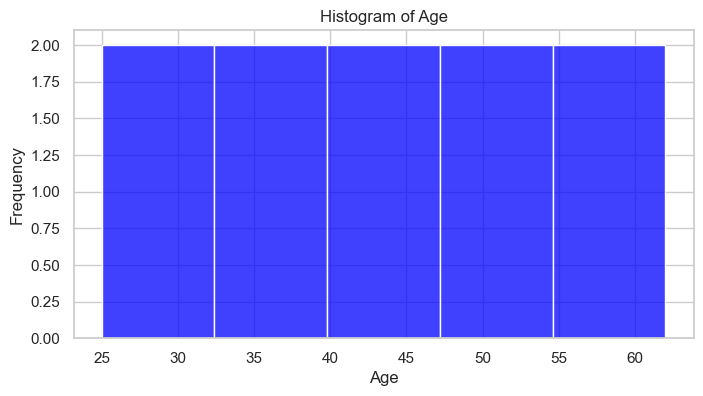

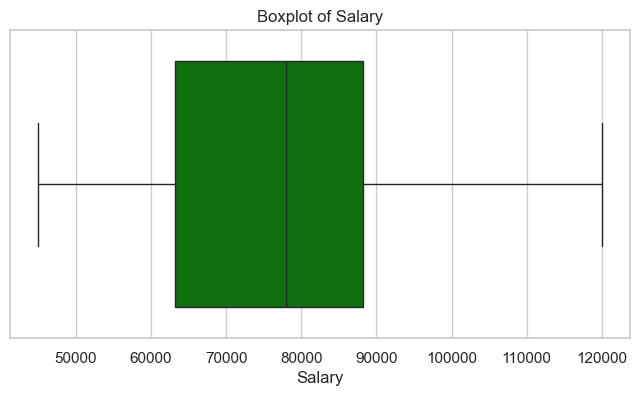

C:\Users\User\AppData\Local\Temp\ipykernel_5484\768925194.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['age'], shade=True, color='red')


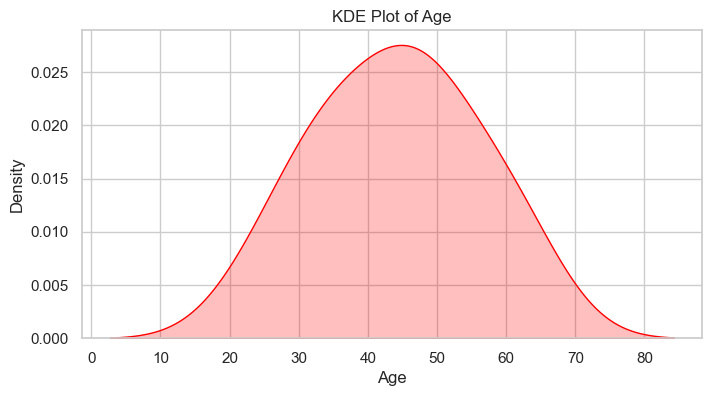

In [3]:
#univartient # Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example dataset
data = pd.DataFrame({
    'age': [25, 32, 47, 51, 62, 35, 48, 38, 44, 59],
    'salary': [50000, 62000, 75000, 81000, 120000, 45000, 90000, 67000, 83000, 110000]
})

# Set a style for the plots
sns.set(style="whitegrid")

# 1. Histogram (for age)
plt.figure(figsize=(8, 4))
sns.histplot(data['age'], bins=5, kde=False, color='blue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Boxplot (for salary)
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['salary'], color='green')
plt.title('Boxplot of Salary')
plt.xlabel('Salary')
plt.show()

# 3. KDE Plot (for age)
plt.figure(figsize=(8, 4))
sns.kdeplot(data['age'], shade=True, color='red')
plt.title('KDE Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


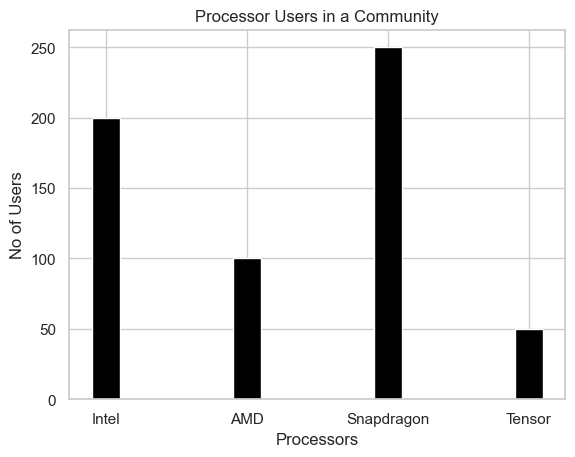

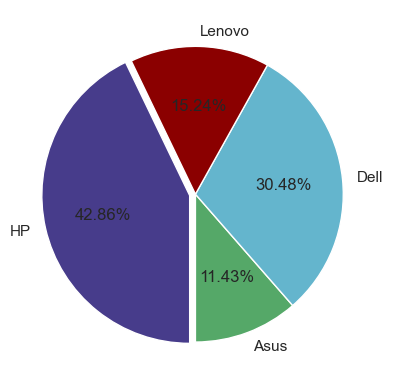

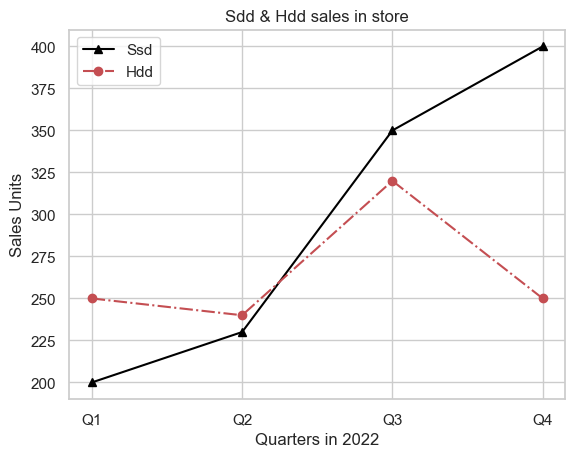

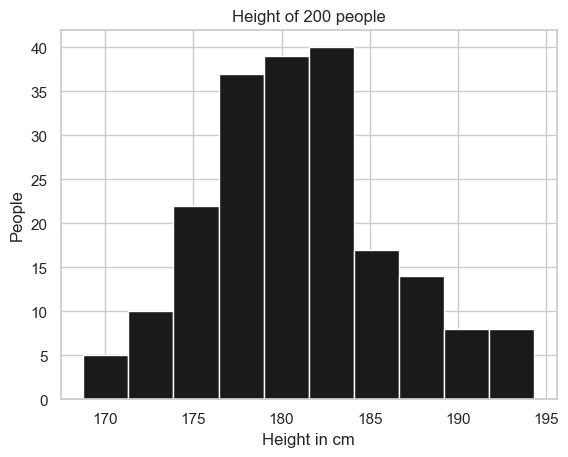

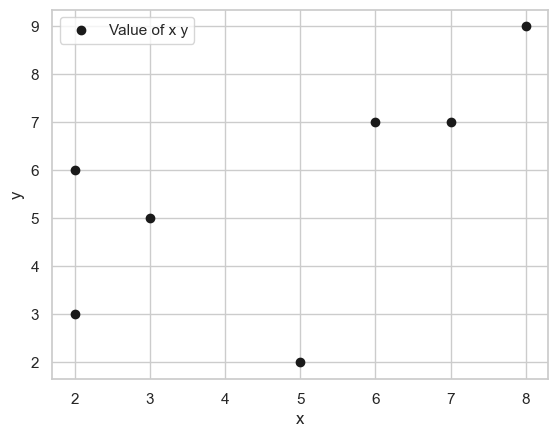

In [11]:
#11 data visualization using matplotlib
#BAR CHART
from matplotlib import pyplot as p
pro_na=["Intel","AMD","Snapdragon","Tensor"]
use=[200,100,250,50]
p.bar(pro_na,use,color='black',width=0.2)
p.xlabel("Processors"),p.ylabel("No of Users")
p.title("Processor Users in a Community")
p.show()
#PIE CHART

us=[12,32,16,45]
la=["Asus","Dell","Lenovo","HP"]
e=[0,0,0,0.04]
c=["g","c","#8B0000","#473C8B"]
pi.pie(us,labels=la,startangle=270,
explode=e,colors=c,autopct='%1.2f%%')
pi.show()
#LINE CHART

Q=["Q1","Q2","Q3","Q4"]
ssd=[200,230,350,400]
hdd=[250,240,320,250]
p.plot(Q,ssd,'^-',color='black')
p.plot(Q,hdd,'o-.r')
p.xlabel("Quarters in 2022"),p.ylabel("Sales Units")
p.title("Sdd & Hdd sales in store")
p.legend(['Ssd','Hdd'])
p.show()
#HISTOGRAM

import numpy as n
x=n.random.normal(180,5,200)
p.hist(x,color='k')
p.xlabel("Height in cm"),p.ylabel("People")
p.title("Height of 200 people")
p.show()
#SCATTER PLOT
from matplotlib import pyplot as p
x=[2,6,8,7,3,2,5]
y=[6,7,9,7,5,3,2]
c=['k','b']
p.scatter(x,y,label='Value of x y',color='k')
p.xlabel('x')
p.ylabel('y')
p.legend()
p.show()
